## Overview

This notebook will show you how to create and query a table or DataFrame that you uploaded to DBFS. [DBFS](https://docs.databricks.com/user-guide/dbfs-databricks-file-system.html) is a Databricks File System that allows you to store data for querying inside of Databricks. This notebook assumes that you have a file already inside of DBFS that you would like to read from.

This notebook is written in **Python** so the default cell type is Python. However, you can use different languages by using the `%LANGUAGE` syntax. Python, Scala, SQL, and R are all supported.

In [0]:
# File location and type
file_location = "/FileStore/tables/farm_ads.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "false"
delimiter = ","


# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

df.printSchema()
display(df)


root
-- _c0: integer (nullable = true)
-- _c1: string (nullable = true)

_c0 _c1 1 ad-jerry ad-bruckheimer ad-chase ad-premier ad-sept ad-th ad-clip ad-bruckheimer ad-chase page found -1 ad-rheumatoid ad-arthritis ad-expert ad-tip ad-info ad-article ad-treatment ad-option ad-support title-understand title-rheumatoid title-arthritis title-everyday title-health header-understand header-rheumatoid header-arthritis understand rheumatoid arthritis everyday health root root act consumer root content everyday solution understand rheumatoid arthritis future ra treatment advance rheumatoid arthritis treatment expect future lead researcher ra treatment research exercise ra check tip slideshow help create workout program ra fitness tip question doctor print list rheumatoid arthritis question doctor visit list ra question understand rheumatoid arthritis tip manage rheumatoid arthritis pain mak key change help manage rheumatoid arthritis pain ease joint pain strive eat balance diet help healthy weight sufficient vitamin mineral counter chronic inflammation tip ease rheumatoid arthritis pain cause rheumatoid arthritis inflammation rheumatoid arthritis ra symptom cause inflammation learn inflammation lead ra symptom joint pain stiffness plus discover cause rheumatoid arthritis rheumatoid arthritis inflammation rheumatoid arthritis management research rheumatoid arthritis research lifestyle choice day impact ra symptom example people ra experience depression treate depression help people manage ra control ra rheumatoid arthritis expert yoga ra yoga safe exercise option person rheumatoid arthritis read dr susan lee answer root act consumer rheumatoid arthritis poll lifestyle change help manage ra pain please select option eat healthy balance diet muscle strengthen aerobic exercise sleep night try reduce manage stress technique haven lifestyle change toolkit healthy recipe shop list meal planner recipe box tool root act consumer enter search term register sign newsletter home health common condition add adhd addiction allergy alternative health alzheimer disease anxiety disorder arthritis asthma autism autoimmune disorder bipolar disorder pain breast cancer cancer cardiovascular health cold flu dental health depression diabete diet nutrition digestive health dvt emotional health epilepsy erectile dysfunction family health fibromyalgia fitness gerd headache migraine healthy home healthy live heart health cholesterol hiv aid hypertension ib incontinence kid health health menopause multiple sclerosis osteoporosis pain management pet health psoriasis rheumatoid arthritis schizophrenia senior health sexual health skin beauty sleep stop smok stroke swine flu weight women health yeast infection condition drug symptom checker flu checkup abdominal pain arm pain pain body ach breast pain breathing difficulty chest pain congestion cough diarrhea ear pain excessive sweate faintness fatigue fever ga headache irregular period joint pain leg pain mouth lesion nausea neck pain rash rectal bleed skin lump sore throat vaginal itch vomite food fitness calorie counter healthy recipe search recipe diet nutrition weight fitness community profile blog discussion photo albums everyday health health tool bmi calculator bmr calculator body fat calculator brain game conversion calculator glossary glucose tracker meal planner calorie counter photo gallery recipe box symptom checker video weight tracker everyday health edit profile inbox discussion blog friend tool copyright everyday health inc everydayhealth com everyday health inc help ad policy advertise link feedback advertise notice site third party advertisement site collect information visit site website provide advertisement service obtain information advertise practice choice online behavioral advertise please click material web site provide educational purpose medical advice diagnosis treatment additional information site subject term privacy policy site comply honcode standard trustworthy health information verify -1 ad-rheumatologist ad-anju ad-varghese ad-yonker ad-ny ad-pomona ad

In [0]:
# Change the column names
data = df.withColumnRenamed("_c0", "class").withColumnRenamed("_c1", "text")
display(data)

class text 1 ad-jerry ad-bruckheimer ad-chase ad-premier ad-sept ad-th ad-clip ad-bruckheimer ad-chase page found -1 ad-rheumatoid ad-arthritis ad-expert ad-tip ad-info ad-article ad-treatment ad-option ad-support title-understand title-rheumatoid title-arthritis title-everyday title-health header-understand header-rheumatoid header-arthritis understand rheumatoid arthritis everyday health root root act consumer root content everyday solution understand rheumatoid arthritis future ra treatment advance rheumatoid arthritis treatment expect future lead researcher ra treatment research exercise ra check tip slideshow help create workout program ra fitness tip question doctor print list rheumatoid arthritis question doctor visit list ra question understand rheumatoid arthritis tip manage rheumatoid arthritis pain mak key change help manage rheumatoid arthritis pain ease joint pain strive eat balance diet help healthy weight sufficient vitamin mineral counter chronic inflammation tip ease rheumatoid arthritis pain cause rheumatoid arthritis inflammation rheumatoid arthritis ra symptom cause inflammation learn inflammation lead ra symptom joint pain stiffness plus discover cause rheumatoid arthritis rheumatoid arthritis inflammation rheumatoid arthritis management research rheumatoid arthritis research lifestyle choice day impact ra symptom example people ra experience depression treate depression help people manage ra control ra rheumatoid arthritis expert yoga ra yoga safe exercise option person rheumatoid arthritis read dr susan lee answer root act consumer rheumatoid arthritis poll lifestyle change help manage ra pain please select option eat healthy balance diet muscle strengthen aerobic exercise sleep night try reduce manage stress technique haven lifestyle change toolkit healthy recipe shop list meal planner recipe box tool root act consumer enter search term register sign newsletter home health common condition add adhd addiction allergy alternative health alzheimer disease anxiety disorder arthritis asthma autism autoimmune disorder bipolar disorder pain breast cancer cancer cardiovascular health cold flu dental health depression diabete diet nutrition digestive health dvt emotional health epilepsy erectile dysfunction family health fibromyalgia fitness gerd headache migraine healthy home healthy live heart health cholesterol hiv aid hypertension ib incontinence kid health health menopause multiple sclerosis osteoporosis pain management pet health psoriasis rheumatoid arthritis schizophrenia senior health sexual health skin beauty sleep stop smok stroke swine flu weight women health yeast infection condition drug symptom checker flu checkup abdominal pain arm pain pain body ach breast pain breathing difficulty chest pain congestion cough diarrhea ear pain excessive sweate faintness fatigue fever ga headache irregular period joint pain leg pain mouth lesion nausea neck pain rash rectal bleed skin lump sore throat vaginal itch vomite food fitness calorie counter healthy recipe search recipe diet nutrition weight fitness community profile blog discussion photo albums everyday health health tool bmi calculator bmr calculator body fat calculator brain game conversion calculator glossary glucose tracker meal planner calorie counter photo gallery recipe box symptom checker video weight tracker everyday health edit profile inbox discussion blog friend tool copyright everyday health inc everydayhealth com everyday health inc help ad policy advertise link feedback advertise notice site third party advertisement site collect information visit site website provide advertisement service obtain information advertise practice choice online behavioral advertise please click material web site provide educational purpose medical advice diagnosis treatment additional information site subject term privacy policy site comply honcode standard trustworthy health information verify -1 ad-rheumatologist ad-anju ad-varghese ad-yonker ad-ny ad-pomona

In [0]:
# Count number of Words in each Text
from pyspark.sql.functions import length
data = data.withColumn('length', length(data['text']))
data.show()

+-----+--------------------+------+
class| text|length|
+-----+--------------------+------+
 1| ad-jerry ad-bruc...| 101|
 -1| ad-rheumatoid ad...| 3817|
 -1| ad-rheumatologis...| 657|
 -1| ad-siemen ad-wat...| 1317|
 -1| ad-symptom ad-mu...| 107|
 1| ad-animal ad-ani...| 79|
 -1| ad-dr ad-enrico ...| 159|
 -1| ad-ulcerative ad...| 2867|
 -1| ad-wellcentive a...| 1631|
 1| ad-free ad-raw a...| 1039|
 -1| ad-north ad-shor...| 847|
 1| ad-world ad-fine...| 1524|
 1| ad-vet ad-online...| 6841|
 -1| ad-gum ad-diseas...| 7522|
 1| ad-rabbit ad-gui...| 47351|
 -1| ad-colitis ad-sy...| 8939|
 -1| ad-disease ad-si...| 1419|
 1| ad-pygmy ad-goat...| 3422|
 1| ad-feed ad-suppl...| 1559|
 -1| ad-www ad-muscle...| 14759|
+-----+--------------------+------+
only showing top 20 rows

In [0]:
# Compare the lenght difference between relevant and non-relevant
data.groupby('class').mean().show()

+-----+----------+------------------+
class|avg(class)| avg(length)|
+-----+----------+------------------+
 -1| -1.0|2919.4418003103983|
 1| 1.0| 3484.166968325792|
+-----+----------+------------------+

In [0]:
# Number of relevant and non-relevant
data.groupby('class').count().show()


+-----+-----+
class|count|
+-----+-----+
 -1| 1933|
 1| 2210|
+-----+-----+

In [0]:
from pyspark.sql import Row
display(data.groupBy('class').count())

class count -1 1933 1 2210

In [0]:
# Treat TF-IDF features for each text
# TF: Term Frequency
# IDF: Inverse Document Frequency
from pyspark.ml.feature import Tokenizer, StopWordsRemover, CountVectorizer, IDF, StringIndexer, VectorAssembler

# Tokenizer to split the text to words
tokenizer = Tokenizer(inputCol="text", outputCol="token_text")
# StopWordsRemover to filter out the stop words and the commonly used words including is, the
stopremove = StopWordsRemover(inputCol='token_text',outputCol='stop_tokens')
#Frequency (TF) of Word 
count_vec = CountVectorizer(inputCol='stop_tokens',outputCol='c_vec')
# Measure the IDF (Inverse Document Frequency) 
idf = IDF(inputCol="c_vec", outputCol="tf_idf")
# Changing the labels in the class column to 0 for relevant ads and 1 for non-relevant ads.
class_num = StringIndexer(inputCol='class',outputCol='label')
final_feature = VectorAssembler(inputCols=['tf_idf', 'length'],outputCol='features')
 
from pyspark.ml import Pipeline
data_prep_pipe = Pipeline(stages=[class_num,tokenizer,stopremove,count_vec,idf,final_feature])
clean_data = data_prep_pipe.fit(data).transform(data)
 
clean_data.show()


+-----+--------------------+------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+
class| text|length|label| token_text| stop_tokens| c_vec| tf_idf| features|
+-----+--------------------+------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+
 1| ad-jerry ad-bruc...| 101| 0.0|[, ad-jerry, ad-b...|[, ad-jerry, ad-b...|(54858,[36,55,137...|(54858,[36,55,137...|(54859,[55,137,11...|
 -1| ad-rheumatoid ad...| 3817| 1.0|[, ad-rheumatoid,...|[, ad-rheumatoid,...|(54858,[0,2,3,6,7...|(54858,[0,2,3,6,7...|(54859,[0,2,3,6,7...|
 -1| ad-rheumatologis...| 657| 1.0|[, ad-rheumatolog...|[, ad-rheumatolog...|(54858,[3,7,36,61...|(54858,[3,7,36,61...|(54859,[3,7,61,65...|
 -1| ad-siemen ad-wat...| 1317| 1.0|[, ad-siemen, ad-...|[, ad-siemen, ad-...|(54858,[1,24,29,3...|(54858,[1,24,29,3...|(54859,[1,24,29,3...|
 -1| ad-symptom ad-mu...| 107| 1.0|[, ad-symptom, ad...|[, ad-symptom, ad...|(54858,[36,55,137...|(54858,[36,55,137...|(54859,[55,137,81...|
 1| ad-animal ad-ani...| 79| 0.0|[, ad-animal, ad-...|[, ad-animal, ad-...|(54858,[36,55,137...|(54858,[36,55,137...|(54859,[55,137,31...|
 -1| ad-dr ad-enrico ...| 159| 1.0|[, ad-dr, ad-enri...|[, ad-dr, ad-enri...|(54858,[36,55,137...|(54858,[36,55,137...|(54859,[55,137,25...|
 -1| ad-ulcerative ad...| 2867| 1.0|[, ad-ulcerative,...|[, ad-ulcerative,...|(54858,[1,3,4,10,...|(54858,[1,3,4,10,...|(54859,[1,3,4,10,...|
 -1| ad-wellcentive a...| 1631| 1.0|[, ad-wellcentive...|[, ad-wellcentive...|(54858,[3,5,7,12,...|(54858,[3,5,7,12,...|(54859,[3,5,7,12,...|
 1| ad-free ad-raw a...| 1039| 0.0|[, ad-free, ad-ra...|[, ad-free, ad-ra...|(54858,[1,2,3,12,...|(54858,[1,2,3,12,...|(54859,[1,2,3,12,...|
 -1| ad-north ad-shor...| 847| 1.0|[, ad-north, ad-s...|[, ad-north, ad-s...|(54858,[3,6,7,18,...|(54858,[3,6,7,18,...|(54859,[3,6,7,18,...|
 1| ad-world ad-fine...| 1524| 0.0|[, ad-world, ad-f...|[, ad-world, ad-f...|(54858,[2,7,24,32...|(54858,[2,7,24,32...|(54859,[2,7,24,32...|
 1| ad-vet ad-online...| 6841| 0.0|[, ad-vet, ad-onl...|[, ad-vet, ad-onl...|(54858,[0,2,3,7,8...|(54858,[0,2,3,7,8...|(54859,[0,2,3,7,8...|
 -1| ad-gum ad-diseas...| 7522| 1.0|[, ad-gum, ad-dis...|[, ad-gum, ad-dis...|(54858,[1,3,4,5,7...|(54858,[1,3,4,5,7...|(54859,[1,3,4,5,7...|
 1| ad-rabbit ad-gui...| 47351| 0.0|[, ad-rabbit, ad-...|[, ad-rabbit, ad-...|(54858,[0,1,2,3,4...|(54858,[0,1,2,3,4...|(54859,[0,1,2,3,4...|
 -1| ad-colitis ad-sy...| 8939| 1.0|[, ad-colitis, ad...|[, ad-colitis, ad...|(54858,[1,2,3,5,7...|(54858,[1,2,3,5,7...|(54859,[1,2,3,5,7...|
 -1| ad-disease ad-si...| 1419| 1.0|[, ad-disease, ad...|[, ad-disease, ad...|(54858,[2,3,13,17...|(54858,[2,3,13,17...|(54859,[2,3,13,17...|
 1| ad-pygmy ad-goat...| 3422| 0.0|[, ad-pygmy, ad-g...|[, ad-pygmy, ad-g...|(54858,[3,5,7,8,1...|(54858,[3,5,7,8,1...|(54859,[3,5,7,8,1...|
 1| ad-feed ad-suppl...| 1559| 0.0|[, ad-feed, ad-su...|[, ad-feed, ad-su...|(54858,[1,3,7,13,...|(54858,[1,3,7,13,...|(54859,[1,3,7,13,...|
 -1| ad-www ad-muscle...| 14759| 1.0|[, ad-www, ad-mus...|[, ad-www, ad-mus...|(54858,[0,1,2,3,5...|(54858,[0,1,2,3,5...|(54859,[0,1,2,3,5...|
+-----+--------------------+------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+
only showing top 20 rows

In [0]:
# Selecting the first row of the data to check the elements
clean_data.take(1)

Out[10]: [Row(class=1, text=' ad-jerry ad-bruckheimer ad-chase ad-premier ad-sept ad-th ad-clip ad-bruckheimer ad-chase page found', length=101, label=0.0, token_text=['', 'ad-jerry', 'ad-bruckheimer', 'ad-chase', 'ad-premier', 'ad-sept', 'ad-th', 'ad-clip', 'ad-bruckheimer', 'ad-chase', 'page', 'found'], stop_tokens=['', 'ad-jerry', 'ad-bruckheimer', 'ad-chase', 'ad-premier', 'ad-sept', 'ad-th', 'ad-clip', 'ad-bruckheimer', 'ad-chase', 'page', 'found'], c_vec=SparseVector(54858, {36: 1.0, 55: 1.0, 137: 1.0, 11561: 1.0, 13104: 1.0, 15646: 1.0, 18047: 2.0, 26963: 1.0, 32004: 2.0, 44973: 1.0}), tf_idf=SparseVector(54858, {36: 0.0, 55: 0.9473, 137: 1.2784, 11561: 5.9315, 13104: 6.25, 15646: 6.5377, 18047: 13.8862, 26963: 7.2308, 32004: 15.2725, 44973: 7.6363}), features=SparseVector(54859, {55: 0.9473, 137: 1.2784, 11561: 5.9315, 13104: 6.25, 15646: 6.5377, 18047: 13.8862, 26963: 7.2308, 32004: 15.2725, 44973: 7.6363, 54858: 101.0}))]

In [0]:
# The last column i.e. the Features column from the first row to examine the Tf-IDf Matrix
clean_data.take(1)[0][-1]

Out[11]: SparseVector(54859, {55: 0.9473, 137: 1.2784, 11561: 5.9315, 13104: 6.25, 15646: 6.5377, 18047: 13.8862, 26963: 7.2308, 32004: 15.2725, 44973: 7.6363, 54858: 101.0})

In [0]:
from pyspark.sql.functions import col
import pyspark.sql.functions as PySparkFunc

# most frequent words in relevant ads
Relevant = clean_data.where(col("label") == 0).select(PySparkFunc.explode('token_text').alias('col')).groupBy('col').count().collect()
display(Relevant)


col count online 1688 electrical 262 inner 14 art 680 travel 447 hope 202 creativity 25 poppy 3 requirement 153 lixit 6 title-pound 1 title-quality 23 jewelry 143 strawberry 161 header-link 27 ad-gift 27 trail 89 activewear 4 recognize 96 barrier 52 title-dev 1 safeegg 7 iframe 7 embrace 41 inflammatory 47 crest 15 emedicine 11 ad-foot 2 cramp 14 harder 9 elevate 11 fog 6 ad-edge 9 monte 21 valine 4 title-effective 6 header-code 22 gesundeit 1 everyday 98 priority 51 ad-chrf 1 chien 4 cosponsor 1 header-marinate 1 avoide 44 outfit 44 earl 7 interaction 16 pringle 29 ad-risk 13 amplifier 9 clinics 11 facs 1 transaction 12 rejuvenate 17 yummi 1 siamk 2 indicator 18 phoenixbirdclipart 2 wirehair 5 thermarest 1 acidity 4 ligament 7 pant 43 nourish 60 chor 36 input 20 header-tm 2 spoil 8 randomly 3 traditionalist 1 hydrate 47 ad-blender 3 brant 10 persist 14 ad-event 5 imitation 4 blossom 15 oscar 8 heeler 6 guli 1 title-bulldog 2 ad-tack 5 carbonate 15 indigenous 11 jkyjxrduzgnmmrjauujcpg 2 title-public 2 kefta 4 brickey 1 shingl 5 methadone 5 ad-turbo 1 targettrade 2 lonni 2 gidley 2 pacquiao 3 marrow 14 usasource 30 guernsey 11 zig 7 carlo 4 bookshelf 5 cautious 1 clog 9 likelihood 5 sopynwm 2 medicare 7 staph 1 socialization 6 ad-skincare 2 ukkjlrcysgknlla 3 sifte 1 positive 1037 television 124 include 1220 vocal 17 ursula 1 import 70 bone 423 retailer 72 expertise 29 productive 30 slightly 63 hurry 52 malt 11 thyroid 202 pycnogenol 9 distributor 61 beverage 54 serrano 8 craigslist 6 auction 157 header-aden 1 title-classifi 26 staff 144 title-leg 2 ad-frozen 19 nausea 17 plurk 2 goji 18 header-blend 6 header-ranch 8 gadget 27 plac 13 operation 75 airflow 3 header-talktractor 1 boergoat 7 otc 48 aorund 1 launch 29 cardiology 8 predominant 8 column 9 conversation 29 ntmzd 2 ad-thehungrypuppy 2 jetfuel 1 ad-tech 2 ad-form 2 ccnw 1 kibbleblue 1 rey 3 photograph 60 lucy 7 ad-emergency 1 shak 37 nutricia 2 wlzwvrmnpkk 1 drain 23 qaeda 2 header-electrolyte 1 shank 7 brich 3 speedy 13 pus 8 ad-italian 5 kamp 2 ad-aloe 1 kiwi 6 olomxgkpx 2 fawn 7 shihpoo 1 furminator 10 tricalcium 3 col 3 hardy 22 enhancement 31 valerie 5 fungicide 4 kirkus 1 metoprolol 5 infective 3 crad 1 shelterpop 6 sigma 2 semanal 4 locavor 2 jurisdiction 13 vibrate 6 bvsc 3 balancer 2 azpxh 4 title-win 4 qhmrgj 1 ad-diatom 2 crust 31 plax 4 fax 110 polare 10 watch 661 australia 634 jpg 980 brett 141 sordmx 4 frustrate 12 ey 157 cook 590 keyboard 12 haunt 5 harry 14 folder 118 achieve 261 header-taste 2 map 1020 hockey 10 chalk 12 sandal 22 header-tn 15 disaster 28 ad-offer 11 evaluation 40 ad-fatty 2 goldfish 37 saliva 16 retriever 86 dehydrate 33 honcode 15 ad-exist 1 title-maryland 2 definately 71 vinegar 35 powerpoint 14 mystuff 2 hometown 11 ad-clinically 4 muscular 20 equal 27 yellowpage 32 clover 24 ct 46 hub 19 goatworld 9 wilsdon 1 christelow 2 refrigerator 23 footframe 1 growth 123 title-veterinarian 18 ad-grass 13 explain 87 mitamin 1 premiere 18 ove 6 title-stock 9 thb 3 bmqty 2 header-breathing 1 ad-mother 2 ad-deck 2 salter 10 gse 3 plane 2 fre 22 hiller 2 drugstore 13 chemistry 16 cable 19 coin 10 zrjekytyefrmhrskpmoa 1 desc 2 newegyptagway 6 title-cottage 3 limb 5 header-sea 2 title-http 1 doppelg 1 resection 1 header-heal 4 neem 4 sail 1 allvetm 3 fenton 2 breezy 6 vca 4 newton 3 greenland 5 der 4 schoolgirl 4 saline 1 pasteurizer 6 title-klean 1 amp 12 mkenwgn 4 tbu 3 mpiq 1 evu 1 ad-medical 10 title-url 11 farm 3791 character 263 ad-guinea 31 ad-compare 83 camcorder 109 nextag 75 prevent 377 perspective 20 ye 1 film 50 pygmy 299 disclaimer 140 globally 3 title-supplier 5 kendall 9 en 84 ad-disease 27 typically 45 roncal 4 oakland 35 providence 33 wy 37 stringent 3 header-barrier 1 title-natura 1 rhode 65 title-reporter 30 agre 39 stomach 164 accusation 1 title-page 28 wav 14 anti 168 wagner 2 midsection 1 slow 87 waistline 4 title-bath 10 header-bladder 1 cholecalciferol 8 intricate 5 juicy 45 valley 139 jar 68 ronnie 5 ad-hog 29 nat 11 babe 5 ex

In [0]:
# most frequent words in relevant ads
non_Relevant = clean_data.where(col("label") == 1).select(PySparkFunc.explode('token_text').alias('col')).groupBy('col').count().collect()
display(non_Relevant)

col count everyday 354 online 722 electrical 61 inflammatory 484 transaction 26 barrier 39 recognize 119 somnodent 8 hope 239 cramp 95 avoide 32 travel 436 nicotine 56 harder 32 mtor 1 elevate 30 input 30 art 138 jewelry 75 interaction 95 rejuvenate 9 likelihood 34 title-prostate 2 ad-johnshopkinshealthalerts 3 ad-edge 23 inner 54 creativity 7 transference 1 npo 9 requirement 200 ad-event 5 clinics 91 ad-prevention 20 persist 17 header-link 2 embrace 6 strawberry 14 herzegovina 1 title-pound 1 indicator 27 header-partner 47 gastronomical 24 iframe 3 ad-skincare 5 carlo 6 hanna 5 oscar 9 pitcher 14 title-effective 31 hydroxatone 29 staph 2 title-quality 14 ad-gift 22 elsa 48 barware 12 forgetful 2 ad-risk 21 header-rodeo 1 title-underactive 1 fog 13 ad-softener 1 cautious 2 flaccid 1 crest 5 habla 2 bookshelf 4 header-tm 1 pant 19 activewear 2 priority 36 ligament 16 hydrate 34 nourish 25 ad-mistak 1 methadone 6 ad-enzyme 1 carbonate 8 flatus 2 trail 13 ad-dc 7 ad-foot 1 halyard 1 blaster 27 medicare 14 reseach 5 stariod 4 header-liver 1 cheyenne 2 anime 3 blossom 4 title-sorte 1 lieutenant 2 morant 2 iffy 5 cosponsor 1 sourcebook 1 poetry 4 kzl 8 cktcs 2 spoil 1 makray 1 clog 4 bronchiectasis 3 dlco 2 canula 3 fergusson 1 siempo 1 mannino 1 rabe 1 apgar 1 confidentiality 4 title-tuin 1 dnt 4 brant 1 header-flotation 1 suzhou 2 lixit 1 rlcat 2 precautionary 2 degrade 1 kitchener 1 nausea 104 sceptical 19 pus 62 bone 624 plac 42 include 1243 operation 200 interferon 22 regularity 15 enhancement 17 macho 1 retailer 25 beverage 47 smhb 1 endoscopic 159 header-blend 2 staff 408 expertise 50 drain 30 stent 3 rhythmic 1 title-classifi 1 distributor 46 thelawfirm 6 conversation 42 positive 143 title-premier 1 finland 3 television 20 gadget 10 speedy 2 column 24 ad-typhoid 1 calvin 4 thyroid 455 productive 9 hurry 13 ad-embryo 3 plurk 4 foradil 2 ad-born 31 header-cryopreservation 2 ad-hodgkin 10 ad-tiffany 14 maroc 2 ad-degenerative 20 manipulative 22 partially 23 occult 6 otc 10 launch 36 shak 13 tippy 1 rey 4 smakelijke 1 excitation 6 header-seven 1 slightly 18 cardiology 8 sigma 3 qaeda 3 advil 8 crust 7 auction 164 fungicide 3 chestnut 4 hardy 3 header-hormone 3 condell 1 drizzle 1 dough 13 richness 1 ad-prize 4 witt 3 ad-code 5 title-win 1 ckt 2 cfm 5 vocal 2 airflow 11 isoproterenol 1 spacer 1 klebsiella 1 ad-form 4 import 8 fraternity 1 schinazi 1 vibrate 3 goforth 2 tricalcium 3 pomace 5 ysf 4 bhavna 2 bioavailable 1 ad-tech 11 photograph 12 honcode 60 ad-arthritisandrheumatologyny 1 fax 101 amp 175 australia 48 watch 359 decay 95 achieve 138 map 725 muscular 57 growth 152 explain 141 ghb 1 header-adhd 3 folder 24 cook 90 ct 104 brett 1 fre 38 disaster 9 previvor 6 ad-ion 44 evaluation 259 yellowpage 14 der 12 coker 1 cable 30 rf 12 ey 285 definately 7 header-ttc 1 equal 47 salter 3 ad-increase 19 ad-mother 3 ad-titzer 1 ad-grass 2 cartier 3 versace 3 yve 4 keyboard 2 lefkosa 1 ad-restore 4 header-request 9 chemistry 20 saliva 22 sandal 4 mystuff 4 celexa 5 raptiva 1 fidele 2 poligrip 1 plexus 11 refrigerator 32 title-modify 1 powerpoint 5 cresta 2 hockey 5 infusion 37 ad-offer 19 dmv 5 header-fertilizer 1 resection 11 gezondheid 1 title-stock 5 adulteration 1 bromelain 19 ad-medical 20 qt 26 ad-acupuncture 3 immundysfuntion 1 haunt 6 looky 4 plaquenil 4 jpg 175 blogimg 1 saline 10 sail 1 title-angel 2 alison 2 plane 5 johann 1 kxvpin 1 ladysmith 1 mmhdw 1 harry 3 needl 1 gaylord 2 vinegar 10 musculoskeletal 16 dispersal 1 hub 19 acetylcholine 2 gurgle 1 expiratory 2 aminopenicillin 1 limb 14 ad-ne 1 header-forum 2 claa 2 goodyblog 10 frustrate 10 ionescu 2 vca 1 xmrv 1 ad-ban 1 coin 2 dimple 3 greece 1 ad-disease 324 anti 270 stomach 226 extension 46 prevent 490 rhode 52 film 36 slow 157 disclaimer 562 settlement 15 title-bodybuild 1 shut 21 farm 292 valley 53 typically 97 lubricate 13 en 79 una 23 tri 33 waistline 4 cmyc 1 ad-hog 5 sandman 6 ad-compare 20 du 4 nat 10 repeatability 4 title-gynecology 6 title-reporter 2 agre 4

In [0]:
#i.	Is it sparse matrix or dense matrix? (Or answer How much percentage of the entries in the matrix is zero?) 

# Calculating the Density and Sparsity of the Tf-IDf Feature Matrix

from numpy import count_nonzero

sparsity_data = (1.0 - count_nonzero(clean_data.take(1)[0][-1]) / clean_data.take(1)[0][-1].size)*100
print ("Sparsity is" ,round( sparsity_data,2),"%")

density_data = (count_nonzero(clean_data.take(1)[0][-1]) / clean_data.take(1)[0][-1].size)*100
print ("Density is" , round(density_data,2),"%")

# it is a sparse matrix as it is 99.98% sparsity

Sparsity is 99.98 %
Density is 0.02 %

In [0]:
## ii. Find two non-zero entries and briefly interpret their meaning, in words. (you do not need to derive their calculation)

#Several strategies outlined in this section can be used to convert text data directly into numbers:

#A. Term Frequency – Inverse Document Frequency (TF – IDF) Term Frequency – Inverse Document Frequency (TF – IDF) Term Frequency – Inverse

#The TF-IDF model is a weighted model used to solve information retrieval problems. Its aim is to translate text documents into vector models based on the appearance of terms in the documents rather than the exact sequence. Let's assume there's a dataset of N text documents, and each document "D" has TF and IDF identified as –

#Term Frequency (TF) – TF is defined as the number of times a term "t" appears in a document "D."

#IDF for a term is specified as the logarithm of the ratio of total documents available in the corpus to the number of documents containing the term T.

#As a result, TF-IDF means that words with a high frequency in the paper have a high TF, but if a word has a high frequency in the corpus, IDF reduces its value.The TF-IDF of a word that appears in all records in the corpus is 0.

# The concept is rarer the greater the numerical weight value. The word becomes more prominent as the weight decreases.
# So in result of "clean_data.take(1)[0][-1]"

#Out[45]: SparseVector(54859, {55: 0.9473, 136: 1.2784, 11294: 5.9315, 12593: 6.25, 15360: 6.5377, 20263: 13.8862, 25034: 15.2725, 32457: 7.2308, 53850: 7.6363, 54858: 101.0})

#Non-Zero entries are:	54: 0.9473     and.  	31835: 15.725

#This indicates that the word with feature 54 appears more often in our dataset than the word with feature 31835; the higher the TF-IDF score, the lower the frequency, and vice versa.

In [0]:
#b. Using logistic regression, partition the data (60% training, 40% validation), and develop a model to classify the documents as ‘relevant’ or ‘non-relevant.’ Comment on your model’s accuracy.

# ## Split data into training and test datasets
training, test = clean_data.randomSplit([0.6, 0.4], seed=12345)
print(training.count())
print(test.count())

2472
1671

In [0]:
# Build Logistic Regression Model
from pyspark.ml.classification import LogisticRegression

log_reg = LogisticRegression(featuresCol='features', labelCol='label')
model = log_reg.fit(training)

results = model.transform(test)


results.select('label','prediction').show()


+-----+----------+
label|prediction|
+-----+----------+
 1.0| 1.0|
 1.0| 1.0|
 1.0| 1.0|
 1.0| 1.0|
 1.0| 1.0|
 1.0| 1.0|
 1.0| 1.0|
 1.0| 1.0|
 1.0| 1.0|
 1.0| 1.0|
 1.0| 1.0|
 1.0| 1.0|
 1.0| 1.0|
 1.0| 1.0|
 1.0| 1.0|
 1.0| 1.0|
 1.0| 1.0|
 1.0| 1.0|
 1.0| 1.0|
 1.0| 1.0|
+-----+----------+
only showing top 20 rows

In [0]:
trainingSummary = model.summary
trainingSummary.roc.show(5)
print("areaUnderROC: " + str(trainingSummary.areaUnderROC))

+---+------------------+
FPR| TPR|
+---+------------------+
0.0| 0.0|
0.0|0.9471890971039182|
0.0|0.9531516183986372|
0.0| 0.954855195911414|
0.0|0.9557069846678024|
+---+------------------+
only showing top 5 rows

areaUnderROC: 0.9999967188414624

In [0]:
print("Coefficients: \n" + str(model.coefficientMatrix))
print("Intercept: " + str(model.interceptVector))


Coefficients: 
DenseMatrix([[-1.58885749e-03, -6.54797848e-03, 1.21205343e-02, ...,
 -1.21429376e-01, 7.67026168e-02, -2.02449722e-05]])
Intercept: [-0.9478253100677432]

In [0]:
# Reset the DataFrames for number of relevant (`dfn`) and non-relevant(`dfy`)ads
dfn = training.filter(training.label == 0)
print("number of relevant ads in training dataset",dfn.count())
dfy = training.filter(training.label == 1)
print("number of non-relevant ads in training dataset",dfy.count())

number of relevant ads in training dataset 1298
number of non-relevant ads in training dataset 1174

In [0]:
display(training.groupBy('label').count())

label count 0.0 1298 1.0 1174

In [0]:
# #### Confusion Matrix

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_true = results.select("label")
y_true = y_true.toPandas()

y_pred = results.select("prediction")
y_pred = y_pred.toPandas()

cnf_matrix = confusion_matrix(y_true, y_pred)

print(cnf_matrix)
print("Prediction Accuracy is ", (cnf_matrix[0,0]+cnf_matrix[1,1])/sum(sum(cnf_matrix)) )

[[818 94]
 [153 606]]
Prediction Accuracy is 0.8521843207660084

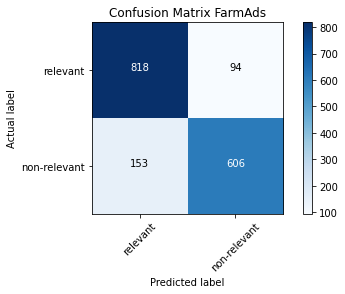

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cnf_matrix, title):
  # Clear Plot
  plt.gcf().clear()

  # Configure figure
  fig = plt.figure(1)
  
  # Configure plot
  classes = ['relevant', 'non-relevant']
  plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  # Normalize and establish threshold
  normalize=False
  fmt = 'd'
  thresh = cnf_matrix.max() / 2.

  # Iterate through the confusion matrix cells
  for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
      plt.text(j, i, format(cnf_matrix[i, j], fmt),
               horizontalalignment="center",
               color="white" if cnf_matrix[i, j] > thresh else "black")

  # Final plot configurations
  plt.tight_layout()
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label') 
  
  # Display images
  image = fig
  
  # Display Plot
  display(image)
  
  # Close Plot
  plt.close(fig)
  
  # Plot confusion matrix  
plot_confusion_matrix(cnf_matrix, "Confusion Matrix FarmAds")

In [0]:
#Comment on your model’s accuracy.
# GETTING THE CLASSIFICATION REPORT

classes = ['relevant', 'non-relevant']

print ('Classification Report:')

print(classification_report(y_true, y_pred, target_names = classes))

# It is 84% for the relevant ads and 87% for the non-relevant ads

Classification Report:
 precision recall f1-score support

 relevant 0.84 0.90 0.87 912
non-relevant 0.87 0.80 0.83 759

 accuracy 0.85 1671
 macro avg 0.85 0.85 0.85 1671
weighted avg 0.85 0.85 0.85 1671

In [0]:
#Comment on your model’s accuracy
# Model Evaluation

from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Select (prediction, true label) and compute test error

evaluator = MulticlassClassificationEvaluator (labelCol="label", predictionCol="prediction", metricName="accuracy")

accuracy = evaluator.evaluate(results)

print ("Test Accuracy = %g" %accuracy)

print("Test Error = %g" % (1.0 - accuracy))

#The model is 85.21% Accurate on testing data. 

Test Accuracy = 0.852184
Test Error = 0.147816

In [0]:
# View best model's predictions and probabilities of each prediction class
selected = results.select("label", "prediction", "probability", "text")
display(selected)

label prediction probability text 1.0 1.0 Map(vectorType -> dense, length -> 2, values -> List(3.8412301488815864E-42, 1.0)) ad-adult ad-vaccination ad-eat ad-exercise ad-vaccinate ad-vaccine ad-location ad-near ad-www ad-helppreventdisease ad-com title-welcome title-helppreventdisease title-com header-prevention header-protection header-leave header-helppreventdisease header-com welcome helppreventdisease com root addthe utility frame root adult vaccination whoop cough hepatitis hepatitis cervical cancer influenza text size share print whoop cough prevention protection vaccine help prevention disease talk healthcare provider vaccine adult don realize immunity provide vaccine fade time adult vulnerable spread disease serious sometime fatal vaccine preventable disease cause adult death stay date recommend vaccination activity eate exercise stay healthy healthcare provider vaccine vaccination result protection vaccine recipient tool vaccination available near look stay date vaccination location vaccination available near select location select vaccine whoop cough hepatitis cervical cancer hepatitis influenza information center disease control prevention cdc cdc recommend adult vaccinate vaccine preventable disease cdc recommend vaccine adult recommend base person gender age risk factor click below access information cdc vaccination adult talk healthcare provider vaccine learn help prevent disease www helppreventwhoopingcough com www helppreventcervicalcancer com www helppreventhepatitis com www refusetheflu com website fund develop glaxosmithkline site intend resident glaxosmithkline reserve legal notice privacy statement medicine save contact leave helppreventdisease com link direct third party web site provide information vaccine preventable disease vaccination web site external glaxosmithkline glaxosmithkline control editorial otherwise content third party web site load 1.0 1.0 Map(vectorType -> dense, length -> 2, values -> List(7.664802670644597E-50, 1.0)) ad-adult ad-vaccine ad-information ad-look ad-adult ad-vaccine ad-info ad-vaccination ad-www ad-helppreventdisease ad-com title-welcome title-helppreventdisease title-com header-prevention header-protection header-leave header-helppreventdisease header-com welcome helppreventdisease com root addthe utility frame root adult vaccination whoop cough hepatitis hepatitis cervical cancer influenza text size share print whoop cough prevention protection vaccine help prevention disease talk healthcare provider vaccine adult don realize immunity provide vaccine fade time adult vulnerable spread disease serious sometime fatal vaccine preventable disease cause adult death stay date recommend vaccination activity eate exercise stay healthy healthcare provider vaccine vaccination result protection vaccine recipient tool vaccination available near look stay date vaccination location vaccination available near select location select vaccine whoop cough hepatitis cervical cancer hepatitis influenza information center disease control prevention cdc cdc recommend adult vaccinate vaccine preventable disease cdc recommend vaccine adult recommend base person gender age risk factor click below access information cdc vaccination adult talk healthcare provider vaccine learn help prevent disease www helppreventwhoopingcough com www helppreventcervicalcancer com www helppreventhepatitis com www refusetheflu com website fund develop glaxosmithkline site intend resident glaxosmithkline reserve legal notice privacy statement medicine save contact leave helppreventdisease com link direct third party web site provide information vaccine preventable disease vaccination web site external glaxosmithkline glaxosmithkline control editorial otherwise content third party web site load 1.0 1.0 Map(vectorType -> dense, length -> 2, values -> List(3.694000542136766E-48, 1.0)) ad-alzheimer ad-treatment ad-free ad-john ad-hopkin ad-alzheimer ad-guide ad-america ad-hospital ad-free title-free title-john title-hopki

In [0]:
from pyspark.ml.classification import DecisionTreeClassifier
 
# Create initial Decision Tree Model
dt = DecisionTreeClassifier(labelCol="label", featuresCol='features', maxDepth=3)

 
# Train model with Training Data
dtModel = dt.fit(training)
display(dtModel)

treeNode {"index":7,"featureType":"continuous","prediction":null,"threshold":0.6383478673534981,"categories":null,"feature":18,"overflow":false} {"index":3,"featureType":"continuous","prediction":null,"threshold":0.868186124898441,"categories":null,"feature":39,"overflow":false} {"index":1,"featureType":"continuous","prediction":null,"threshold":0.9746471235197769,"categories":null,"feature":420,"overflow":false} {"index":0,"featureType":null,"prediction":0.0,"threshold":null,"categories":null,"feature":null,"overflow":false} {"index":2,"featureType":null,"prediction":1.0,"threshold":null,"categories":null,"feature":null,"overflow":false} {"index":5,"featureType":"continuous","prediction":null,"threshold":4.041940771155104,"categories":null,"feature":286,"overflow":false} {"index":4,"featureType":null,"prediction":0.0,"threshold":null,"categories":null,"feature":null,"overflow":false} {"index":6,"featureType":null,"prediction":1.0,"threshold":null,"categories":null,"feature":null,"overflow":false} {"index":11,"featureType":"continuous","prediction":null,"threshold":2.604558374695323,"categories":null,"feature":39,"overflow":false} {"index":9,"featureType":"continuous","prediction":null,"threshold":0.7897427950753746,"categories":null,"feature":9,"overflow":false} {"index":8,"featureType":null,"prediction":1.0,"threshold":null,"categories":null,"feature":null,"overflow":false} {"index":10,"featureType":null,"prediction":0.0,"threshold":null,"categories":null,"feature":null,"overflow":false} {"index":13,"featureType":"continuous","prediction":null,"threshold":1.3402212728890566,"categories":null,"feature":308,"overflow":false} {"index":12,"featureType":null,"prediction":0.0,"threshold":null,"categories":null,"feature":null,"overflow":false} {"index":14,"featureType":null,"prediction":1.0,"threshold":null,"categories":null,"feature":null,"overflow":false}

In [0]:
predictionsdt = dtModel.transform(test)


# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictionsdt)

print ("Test Accuracy for decision tree= %g" %accuracy)
print("Test Error for decision tree = %g " % (1.0 - accuracy))


Test Accuracy for decision tree= 0.75763
Test Error for decision tree = 0.24237

In [0]:
%sql

/* Query the created temp table in a SQL cell */

select * from `farm_ads_csv`

com.databricks.backend.common.rpc.DatabricksExceptions$SQLExecutionException: org.apache.spark.sql.AnalysisException: Table or view not found: farm_ads_csv; line 3 pos 14;
'Project [*]
+- 'UnresolvedRelation [farm_ads_csv], [], false

	at org.apache.spark.sql.catalyst.analysis.package$AnalysisErrorAt.failAnalysis(package.scala:42)
	at org.apache.spark.sql.catalyst.analysis.CheckAnalysis.$anonfun$checkAnalysis$1(CheckAnalysis.scala:119)
	at org.apache.spark.sql.catalyst.analysis.CheckAnalysis.$anonfun$checkAnalysis$1$adapted(CheckAnalysis.scala:95)
	at org.apache.spark.sql.catalyst.trees.TreeNode.foreachUp(TreeNode.scala:190)
	at org.apache.spark.sql.catalyst.trees.TreeNode.$anonfun$foreachUp$1(TreeNode.scala:189)
	at org.apache.spark.sql.catalyst.trees.TreeNode.$anonfun$foreachUp$1$adapted(TreeNode.scala:189)
	at scala.collection.immutable.List.foreach(List.scala:392)
	at org.apache.spark.sql.catalyst.trees.TreeNode.foreachUp(TreeNode.scala:189)
	at org.apache.spark.sql.catalyst.analysis.CheckAnalysis.checkAnalysis(CheckAnalysis.scala:95)
	at org.apache.spark.sql.catalyst.analysis.CheckAnalysis.checkAnalysis$(CheckAnalysis.scala:92)
	at org.apache.spark.sql.catalyst.analysis.Analyzer.checkAnalysis(Analyzer.scala:204)
	at org.apache.spark.sql.catalyst.analysis.Analyzer.$anonfun$executeAndCheck$1(Analyzer.scala:227)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper$.markInAnalyzer(AnalysisHelper.scala:232)
	at org.apache.spark.sql.catalyst.analysis.Analyzer.executeAndCheck(Analyzer.scala:224)
	at org.apache.spark.sql.execution.QueryExecution.$anonfun$analyzed$1(QueryExecution.scala:96)
	at org.apache.spark.sql.catalyst.QueryPlanningTracker.measurePhase(QueryPlanningTracker.scala:132)
	at org.apache.spark.sql.execution.QueryExecution.$anonfun$executePhase$1(QueryExecution.scala:176)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:843)
	at org.apache.spark.sql.execution.QueryExecution.executePhase(QueryExecution.scala:176)
	at org.apache.spark.sql.execution.QueryExecution.analyzed$lzycompute(QueryExecution.scala:97)
	at org.apache.spark.sql.execution.QueryExecution.analyzed(QueryExecution.scala:94)
	at org.apache.spark.sql.execution.QueryExecution.assertAnalyzed(QueryExecution.scala:86)
	at org.apache.spark.sql.Dataset$.$anonfun$ofRows$2(Dataset.scala:102)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:843)
	at org.apache.spark.sql.Dataset$.ofRows(Dataset.scala:100)
	at org.apache.spark.sql.SparkSession.$anonfun$sql$1(SparkSession.scala:678)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:843)
	at org.apache.spark.sql.SparkSession.sql(SparkSession.scala:673)
	at org.apache.spark.sql.SQLContext.sql(SQLContext.scala:694)
	at com.databricks.backend.daemon.driver.SQLDriverLocal.$anonfun$executeSql$1(SQLDriverLocal.scala:91)
	at scala.collection.TraversableLike.$anonfun$map$1(TraversableLike.scala:238)
	at scala.collection.immutable.List.foreach(List.scala:392)
	at scala.collection.TraversableLike.map(TraversableLike.scala:238)
	at scala.collection.TraversableLike.map$(TraversableLike.scala:231)
	at scala.collection.immutable.List.map(List.scala:298)
	at com.databricks.backend.daemon.driver.SQLDriverLocal.executeSql(SQLDriverLocal.scala:37)
	at com.databricks.backend.daemon.driver.SQLDriverLocal.repl(SQLDriverLocal.scala:144)
	at com.databricks.backend.daemon.driver.DriverLocal.$anonfun$execute$12(DriverLocal.scala:494)
	at com.databricks.logging.UsageLogging.$anonfun$withAttributionContext$1(UsageLogging.scala:240)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.UsageLogging.withAttributionContext(UsageLogging.scala:235)
	at com.databricks.logging.UsageLogging.withAttributionContext$(UsageLogging.scala:232)
	at com.databricks.backend.daemon.driver.DriverLocal.withAttributionContext(DriverLocal.scala:50)
	at com.databricks.logging.UsageLogging.withAttributionTags(UsageLogging.scala:277)
	at com.databricks.logging.Usag

In [0]:
# With this registered as a temp view, it will only be available to this particular notebook. If you'd like other users to be able to query this table, you can also create a table from the DataFrame.
# Once saved, this table will persist across cluster restarts as well as allow various users across different notebooks to query this data.
# To do so, choose your table name and uncomment the bottom line.

permanent_table_name = "farm_ads_csv"

# df.write.format("parquet").saveAsTable(permanent_table_name)